In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("SuperStore_Sales_Dataset.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [ ]:
df["Order Date"] = pd.to_datetime(
    df["Order Date"],
    errors="coerce",
    dayfirst=True
)


In [ ]:
df["Order Date"].isna().sum()


np.int64(0)

In [ ]:
df = df.dropna(subset=["Order Date"])


In [59]:
df.dtypes


,0
Row ID+O6G3A1:R6,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [60]:
plt.style.use("dark_background")

sns.set_theme(
    style="dark",
    palette="bright",
    rc={
        "figure.facecolor": "#000000",
        "axes.facecolor": "#000000",
        "savefig.facecolor": "#000000",
        "axes.edgecolor": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "text.color": "white",
        "grid.color": "#333333"
    }
)

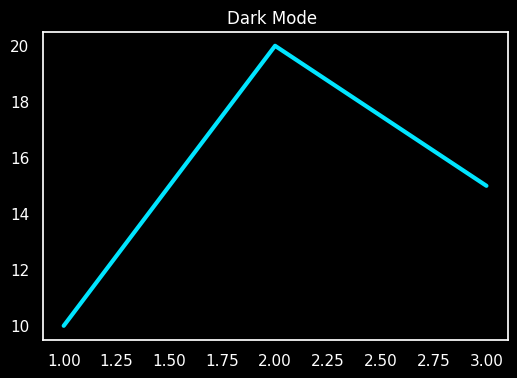

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.plot([1, 2, 3], [10, 20, 15], color="#00E5FF", linewidth=3)
ax.set_title("Dark Mode ")
plt.show()


In [13]:
region_data = (
    df.groupby("Region")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

region_data


,Region,Sales,Profit
0,Central,341007.5242,27450.0071
1,East,450234.6660,53400.4243
2,South,252121.0810,26551.7163
3,West,522441.0520,67859.9582


/tmp/ipython-input-121350931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


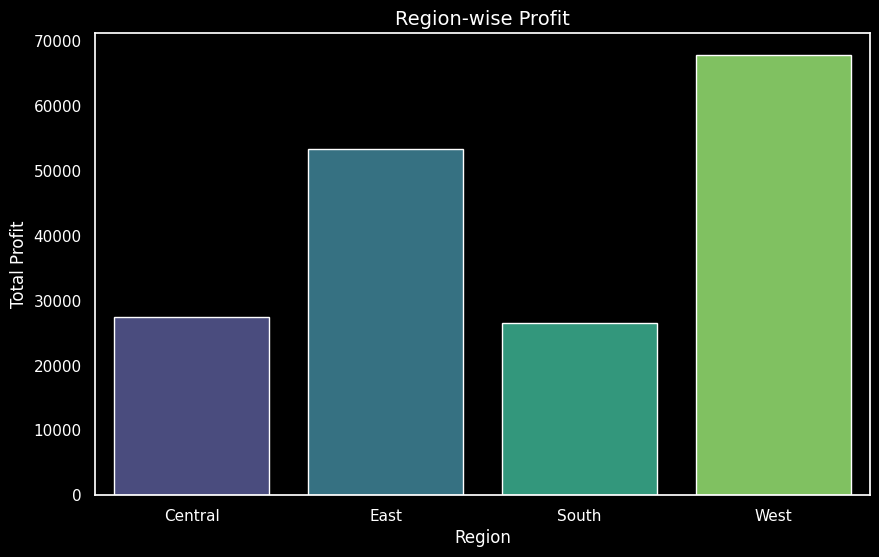

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

sns.barplot(
    data=region_data,
    x="Region",
    y="Profit",
    palette="viridis",
    ax=ax
)

ax.set_title("Region-wise Profit", fontsize=14)
ax.set_xlabel("Region")
ax.set_ylabel("Total Profit")

plt.show()


/tmp/ipython-input-3428444862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


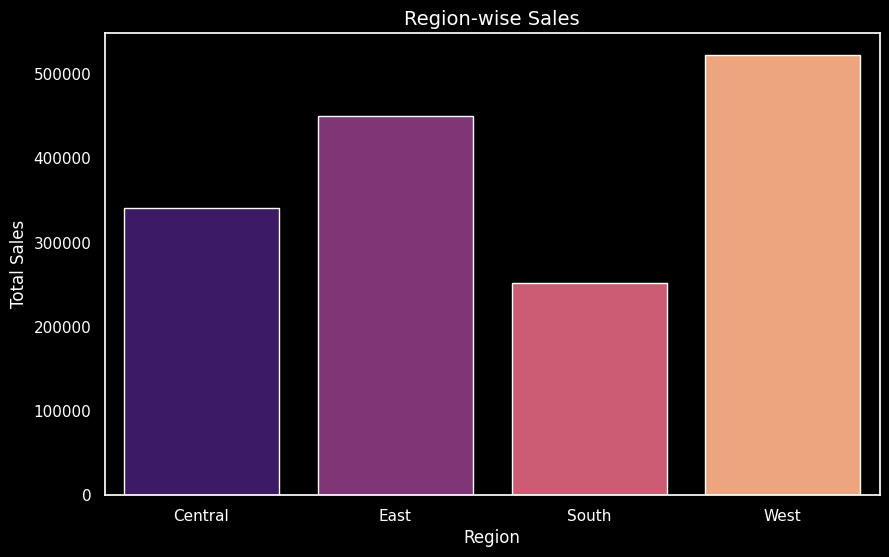

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

sns.barplot(
    data=region_data,
    x="Region",
    y="Sales",
    palette="magma",
    ax=ax
)

ax.set_title("Region-wise Sales", fontsize=14)
ax.set_xlabel("Region")
ax.set_ylabel("Total Sales")

plt.show()


In [16]:
category_data = (
    df.groupby("Category")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

category_data


,Category,Sales,Profit
0,Furniture,451508.6452,10006.6112
1,Office Supplies,643707.6870,74797.2461
2,Technology,470587.9910,90458.2486


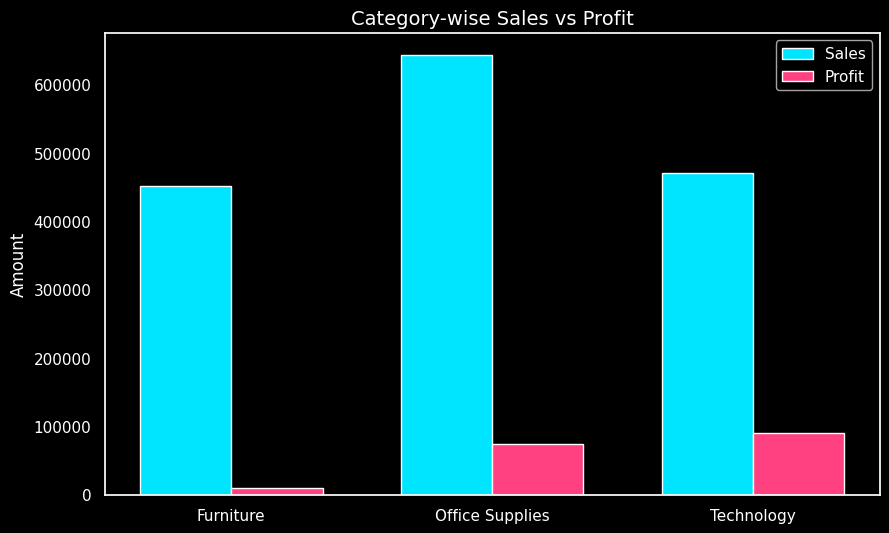

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

x = np.arange(len(category_data))
width = 0.35

ax.bar(
    x - width/2,
    category_data["Sales"],
    width,
    label="Sales",
    color="#00E5FF"
)

ax.bar(
    x + width/2,
    category_data["Profit"],
    width,
    label="Profit",
    color="#FF4081"
)

ax.set_xticks(x)
ax.set_xticklabels(category_data["Category"])
ax.set_title("Category-wise Sales vs Profit", fontsize=14)
ax.set_ylabel("Amount")
ax.legend()

plt.show()


In [18]:
df["Month"] = df["Order Date"].dt.to_period("M")


In [19]:
df[["Order Date", "Month"]].head()


,Order Date,Month
0,2019-01-01,2019-01
1,2019-01-02,2019-01
2,2019-01-02,2019-01
3,2019-01-03,2019-01
4,2019-01-03,2019-01


In [20]:
monthly_sales = (
    df.groupby("Month")["Sales"]
    .sum()
    .reset_index()
)


In [21]:
monthly_sales["Month"] = monthly_sales["Month"].astype(str)


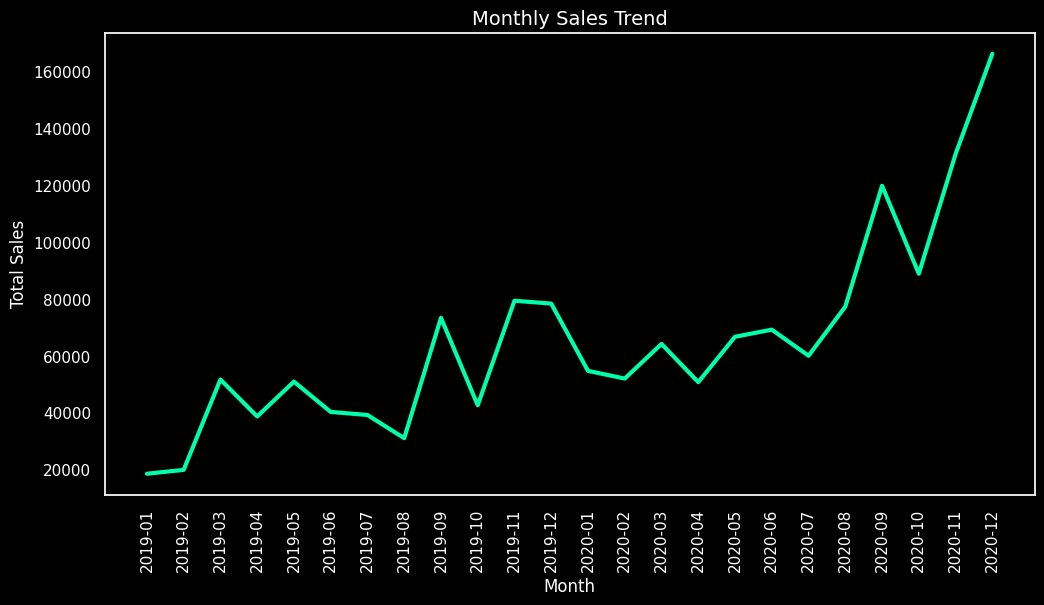

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.plot(
    monthly_sales["Month"],
    monthly_sales["Sales"],
    color="#00FFAB",
    linewidth=3
)

ax.set_title("Monthly Sales Trend", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales")
ax.tick_params(axis="x", rotation=90)

plt.show()


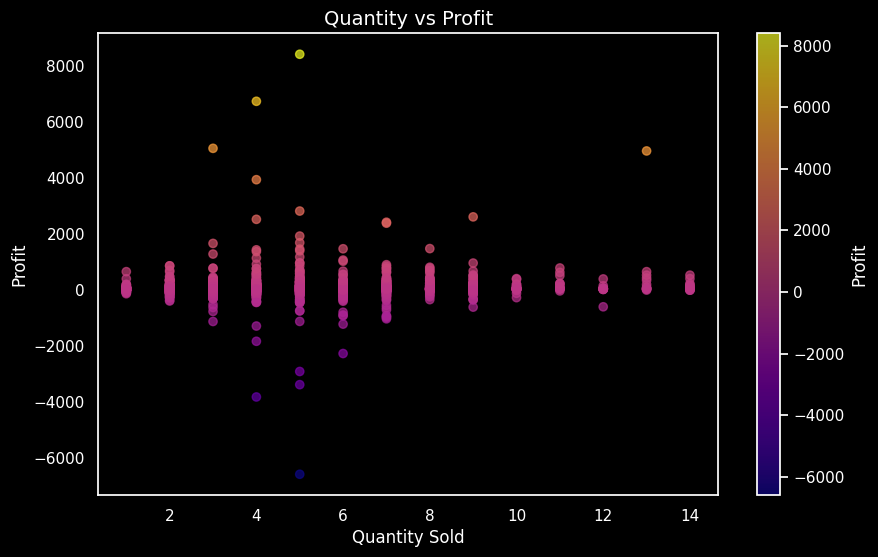

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

scatter = ax.scatter(
    df["Quantity"],
    df["Profit"],
    c=df["Profit"],
    cmap="plasma",
    alpha=0.7
)

ax.set_title("Quantity vs Profit", fontsize=14)
ax.set_xlabel("Quantity Sold")
ax.set_ylabel("Profit")

cbar = plt.colorbar(scatter)
cbar.set_label("Profit")

plt.show()


In [26]:
product_profit = (
    df.groupby("Product Name")["Profit"]
    .sum()
    .reset_index()
)


In [27]:
loss_products = product_profit[product_profit["Profit"] < 0]


In [28]:
loss_products.shape


(309, 2)

In [29]:
top_10_losses = (
    loss_products
    .sort_values(by="Profit")
    .head(10)
)


In [31]:
top_10_losses["Short Product Name"] = (
    top_10_losses["Product Name"]
    .str.slice(0, 25) + "..."
)


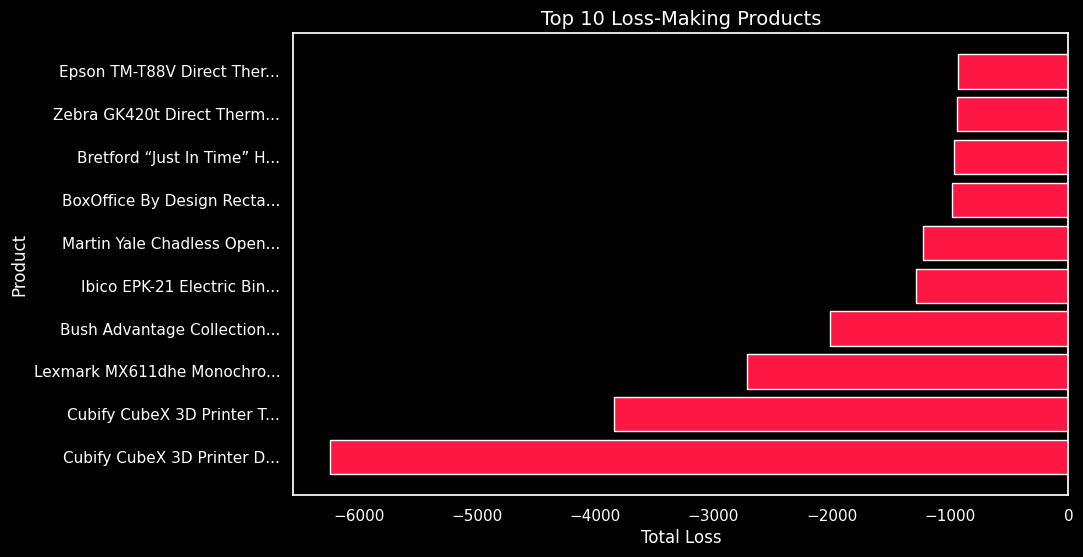

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.barh(
    top_10_losses["Short Product Name"],
    top_10_losses["Profit"],
    color="#FF1744"
)

ax.set_title("Top 10 Loss-Making Products", fontsize=14)
ax.set_xlabel("Total Loss")
ax.set_ylabel("Product")

plt.show()


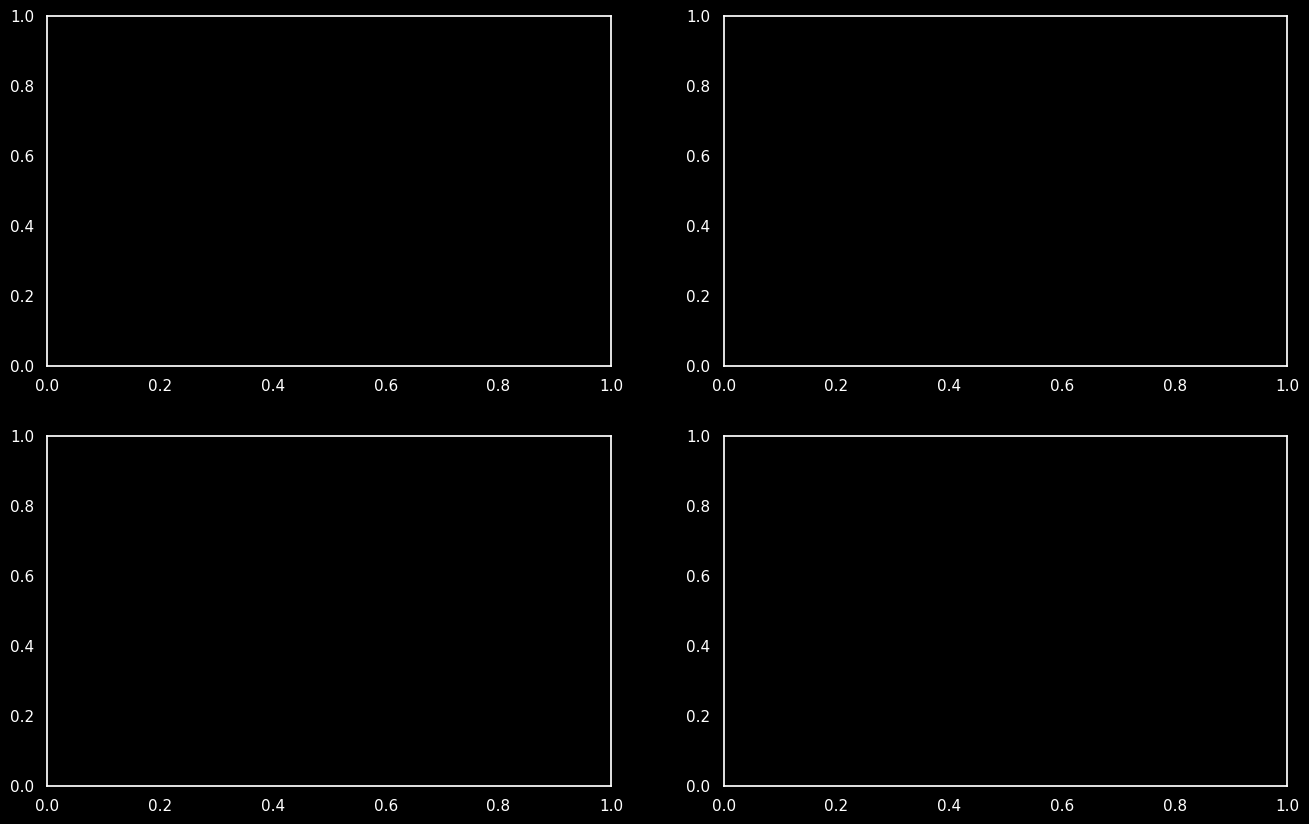

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.patch.set_facecolor("black")
for ax in axs.flat:
    ax.set_facecolor("black")


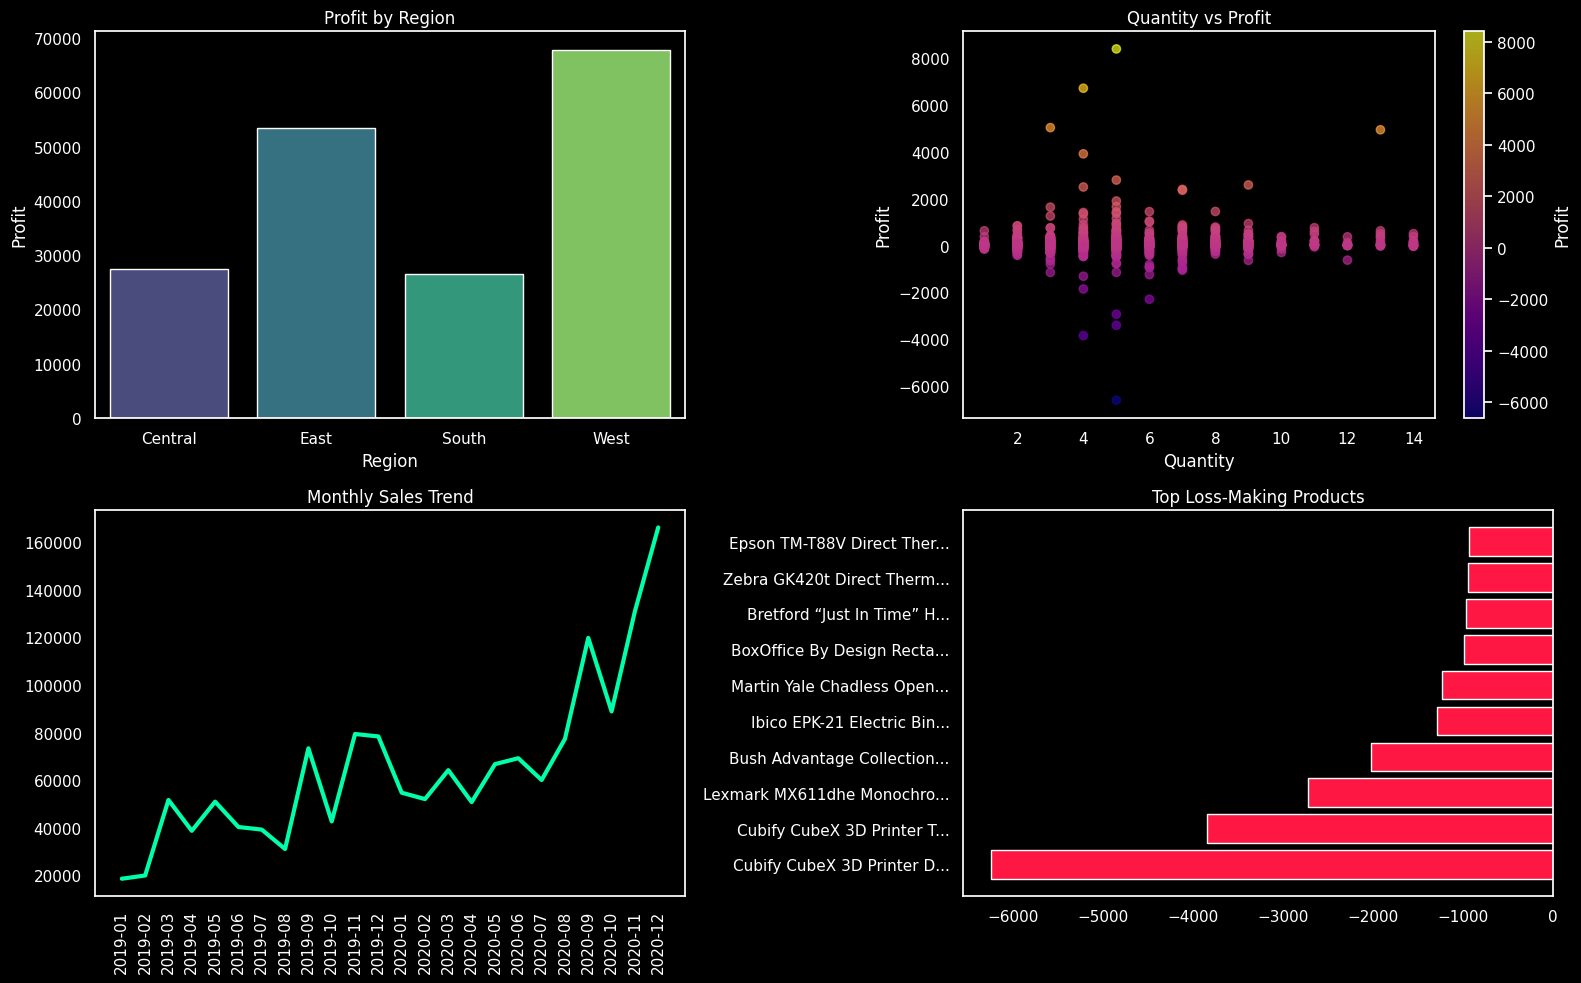

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.patch.set_facecolor("black")

for ax in axs.flat:
    ax.set_facecolor("black")

sns.barplot(
    data=region_data,
    x="Region",
    y="Profit",
    hue="Region",
    palette="viridis",
    legend=False,
    ax=axs[0,0]
)
axs[0,0].set_title("Profit by Region", color="white")


scatter = axs[0,1].scatter(
    df["Quantity"],
    df["Profit"],
    c=df["Profit"],
    cmap="plasma",
    alpha=0.7
)

axs[0,1].set_title("Quantity vs Profit", color="white")
axs[0,1].set_xlabel("Quantity", color="white")
axs[0,1].set_ylabel("Profit", color="white")

fig.colorbar(scatter, ax=axs[0,1], label="Profit")



axs[1,0].plot(
    monthly_sales["Month"],
    monthly_sales["Sales"],
    color="#00FFAB",
    linewidth=3
)
axs[1,0].set_title("Monthly Sales Trend", color="white")
axs[1,0].tick_params(axis="x", rotation=90)


axs[1,1].barh(
    top_10_losses["Short Product Name"],
    top_10_losses["Profit"],
    color="#FF1744"
)
axs[1,1].set_title("Top Loss-Making Products", color="white")

plt.tight_layout()
plt.show()
